In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import warnings
warnings.filterwarnings('ignore')
from pylab import rcParams
%matplotlib inline

In [51]:
data=pd.read_csv(r'D:\pandasdataset\project\web_scrapper\pune_property.csv')

In [52]:
data.head()

,bhk,area,locality,price,status1,status2
0,1.0,650,"Nehru Nagar, Pimpri Chinchwad",13000,Unfurnished,1 floor
1,1.0,550,"Keshav Nagar, Mundhwa",13000,Unfurnished,3 floor 2 BHK
2,2.0,575,NaN,4000,Semi-Furnished,3 floor
3,1.0,550,Lohegaon,8000,Ravet,"Pimpri Chinchwad"" itemprop=""name""/>\n<meta co..."
4,2.0,900,"Sun City, Anand Nagar",24000,Unfurnished,11 floor Pethkar SiyonaUltra spacious


### The data is prepared using web-scrapping. Now we ned to perform data cleaning process

#### Lets analyse all the variables one by one

In [53]:
data['bhk']

0       1.0
1       1.0
2       2.0
3       1.0
4       2.0
       ... 
1995    2.0
1996    2.0
1997    NaN
1998    2.0
1999    2.0
Name: bhk, Length: 2000, dtype: float64

In [54]:
data['bhk'].isnull().sum()

20

In [55]:
data['bhk'].value_counts()

2.0    993
1.0    675
3.0    262
4.0     39
5.0      9
8.0      1
6.0      1
Name: bhk, dtype: int64

In [56]:
data['area'].isnull().sum()

0

#### We make have some special values in area variable

In [57]:
data['area'].unique()

array(['650', '550', '575', '900', '800', '700', '465', '772', '1430',
       '1800', '1100', '750', '910', '1059', '600', '798', '300', '950',
       '500', '444', '1025', '850', '1050', '980', '666', '1375', '930',
       '1176', '1020', '1650', '832', '1350', '790', '1300', '719',
       '1200', '1550', '909', '1365', '846', '705', '634', '1750', '1555',
       '917', '678', '975', '1850', '1250', '630', '1030', '2097', '2000',
       '643', '953', 'Multistorey', '920', '3750', '970', '993', '2500',
       '160', '670', '1437', '2900', '1950', '1500', '2350', '576', '677',
       '890', '570', '250', '4200', '690', '1008', '540', 'Villa', '983',
       '2863', '1000', '635', '2562', '1130', '2881', '1047', '560',
       '1080', '640', '789', '840', '3300', '1400', '927', '1450', '1048',
       '400', '1167', '186', '1150', '1335', '450', '1560', '1214',
       '1169', '744', '1370', '615', '1304', '475', '611', 'ft', '872',
       '688', '1480', '855', '380', '686', '1385', '2300', 

#### 'area' columns contains string values like ft, villa, multistorey which need to be removed

In [58]:
data.loc[data['area'].str.contains("ft",na=False),'area']=None
data.loc[data['area'].str.contains("Multistorey",na=False),'area']=None
data.loc[data['area'].str.contains("FOR",na=False),'area']=None
data.loc[data['area'].str.contains("Villa",na=False),'area']=None

### locality column needto modify by removing additional information given before location such as 'Nehru Nagar, Pimpri Chinchwad'

In [59]:
loc=data['locality'].str.split(",",n=2,expand=True)
data['loc1']=loc[0]
data['loc2']=loc[1]

#### creating new colum location 

In [60]:
data.loc[data['loc2'].isnull(),'loc2'] = data['loc1']
data['location']=data['loc1']

In [61]:
data=data.drop(['loc1','loc2'],axis=1)

In [62]:
data['location'].isnull().sum()

311

In [63]:
data['location'].unique()

array(['Nehru Nagar', 'Keshav Nagar', nan, 'Lohegaon', 'Sun City',
       'Kothrud', 'Talegaon Dabhade', 'Model Colony', 'Wakad',
       'Wadgaon Sheri', 'Wagholi', 'Hadapsar', 'Thergaon', 'Hinjewadi',
       'Sunita Nagar', 'Shirgaon', 'Talegaon Dhamdhere',
       'Hinjewadi Phase 3', 'Bijlinagar', 'Undri', 'Ravet',
       'Solapur Road', 'Warje', 'Sinhagad Road', 'Kharadi',
       'Ambedkar Nagar-Kondhwa', 'Sus', 'Dhanori', 'Baner road',
       'Koregaon Park', 'Ambe Gaon', 'Ambegaon Budruk', 'Panmala',
       'Viman Nagar', 'Rahatni', 'Datta Nagar', 'Hinjewadi Phase 1',
       'Mangaldas Road', 'Kaspate Vasti', 'Vadgaon', 'Sangam Bridge',
       'Pimple Nilakh', 'Baner', 'Vishrantwadi', 'Gananjay Society',
       'Phursungi', 'Nigdi', 'Bund Garden Road', 'EON Free Zone',
       'Pashan-Sus Road', 'Tathawade', 'Pimple Gurav', 'Dighi',
       'Shukrawar Peth', 'Vishal Nagar', 'Pirangut', 'Pimpri',
       'Kalyani Nagar', 'Erandwane', 'Vadgaon Maval', 'Moshi',
       'Magarpatta City',

### Lets clean price variable

In [64]:
data['price'].isnull().sum()

0

In [65]:
data['price'].unique()

array(['13000', '4000', '8000', '24000', '16500', '16000', '21000',
       '22700', '5000', '14500', '12000', '15700', '20000', '10500',
       '4500', '28000', '17000', '13060', '14000', '10000', '26000',
       '11000', '9000', '22500', '18000', '33000', '22000', '15000',
       '19000', '45000', '50000', '25000', '12500', '47500', '75000',
       '35000', '6500', '1.1 Lac', '35117', '17500', '60000', '65000',
       '12800', '23500', '44000', '5500', '23000', '3.8 Lac', '39500',
       '38000', '58000', '30000', '13500', '3700', '95000', '40000',
       '7000', '70000', '13580', '15500', '6000', '18500', '32000',
       '9500', '27500', '12778', '7500', '24500', '29000', '11500',
       '51000', '26500', '9250', '42000', '27000', '1.8 Lac', '1.2 Lac',
       '1.9 Lac', '16999', '12501', '8500', '15750', '19500', '31000',
       '19460', '56000', '17750', '47000', '8200', '10200', '90000',
       '1.5 Lac', '39000', '34000', '8592', '21500', '5300', '37500',
       '13800', '3000', '

#### few properties are offering price in words for eg. 1.5Lac. lets clean the values

In [66]:
data.loc[data['price'].str.contains("Lac"),'price']=data['price'].replace("Lac","",regex=True).astype(float)*100000

In [67]:
data['price']=data['price'].astype(int)

### Variable 'status1' and 'status2' are talking about condition of flat ie Furnished, Semi-furnished and Unfurnished

In [68]:
data.loc[~data.status1.str.contains('Furnished|Unfurnished|Semi-Furnished'),'status1']=None
data.loc[~data.status2.str.contains('Furnished|Unfurnished|Semi-Furnished'),'status2']=None

In [69]:
data.loc[data['status1'].isnull(),'status1'] = data['status2']

In [70]:
data['status1'].isnull().sum()

133

In [71]:
data['condition']=data['status1']

In [72]:
data=data.drop(['status1','status2','locality'],axis=1)

In [73]:
total = data.isnull().sum()
percent = (data.isnull().sum()/data.isnull().count())
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
bhk,20,0.0100
area,21,0.0105
price,0,0.0000
location,311,0.1555
condition,133,0.0665


In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   bhk        1980 non-null   float64
 1   area       1979 non-null   object 
 2   price      2000 non-null   int32  
 3   location   1689 non-null   object 
 4   condition  1867 non-null   object 
dtypes: float64(1), int32(1), object(3)
memory usage: 70.4+ KB


### lets handle missing value

#### lets replace NA values of location by 'Pune'

In [75]:
data.loc[data['location'].isnull(),'location'] = 'Pune'

#### lets replace NA value of condition by 'meadian'

In [76]:
data['condition'].value_counts()

Unfurnished       935
Furnished         600
Semi-Furnished    332
Name: condition, dtype: int64

In [77]:
data.loc[data['condition'].isnull(),'condition'] = 'Unfurnished'

#### lets drop NA values for the column 'area' and 'bhk'

In [78]:
data=data.dropna()

In [79]:
total = data.isnull().sum()
percent = (data.isnull().sum()/data.isnull().count())
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
bhk,0,0.0
area,0,0.0
price,0,0.0
location,0,0.0
condition,0,0.0


In [80]:
data.head()

,bhk,area,price,location,condition
0,1.0,650,13000,Nehru Nagar,Unfurnished
1,1.0,550,13000,Keshav Nagar,Unfurnished
2,2.0,575,4000,Pune,Semi-Furnished
3,1.0,550,8000,Lohegaon,Unfurnished
4,2.0,900,24000,Sun City,Unfurnished


### Lets perform explorative data analysis

#### Price will be our target variable

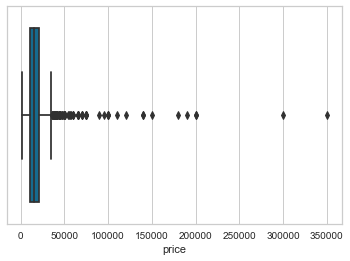

In [81]:
sn.boxplot('price',data=data)

#### it seems that data is highly skewed. Lets remove outliers from the data 

In [82]:
m=np.mean(data['price'])
st=np.std(data['price'])
data=data[(data['price']>(m-st)) & (data['price']<=(m+st))]

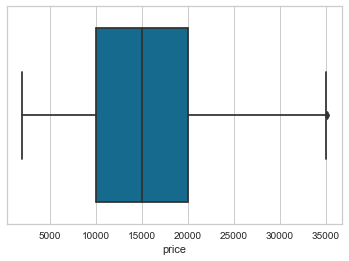

In [83]:
sn.boxplot('price',data=data)

#### analyzing 'area' variable

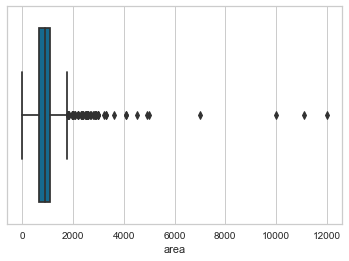

In [84]:
data['area']=data['area'].astype(int)
sn.boxplot('area',data=data)

#### 'area' variable also has few outliers

In [85]:
m=np.mean(data['area'])
st=np.std(data['area'])
data=data[(data['area']>(m-st)) & (data['area']<=(m+st))]

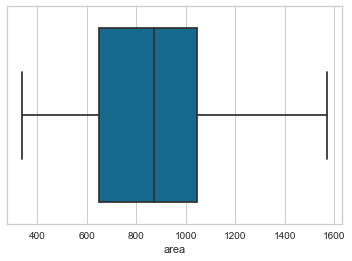

In [86]:
sn.boxplot('area',data=data)

#### analyzing 'bhk' variable

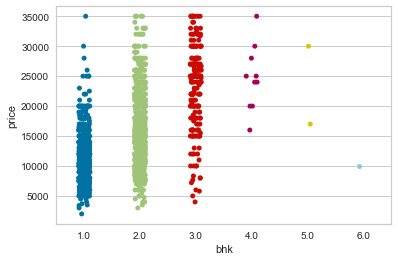

In [87]:
sn.stripplot(x=data['bhk'],y=data['price'],data=data)

#### rent of the property increases as no of bedrooms increases

In [88]:
data=data[data.bhk<=4]

#### performing EDA on 'condition' variable

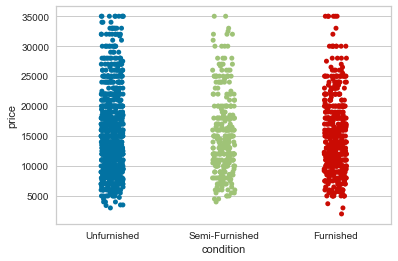

In [89]:
sn.stripplot(x=data['condition'],y=data['price'],data=data)

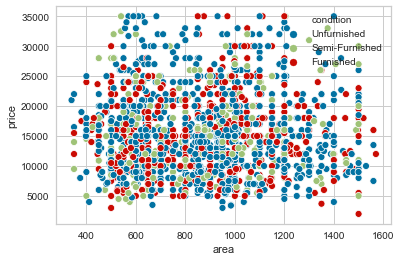

In [90]:
sn.scatterplot(x='area',y='price',hue='condition',data=data)

#### performing EDA on location variable

<Figure size 10800x360 with 0 Axes>

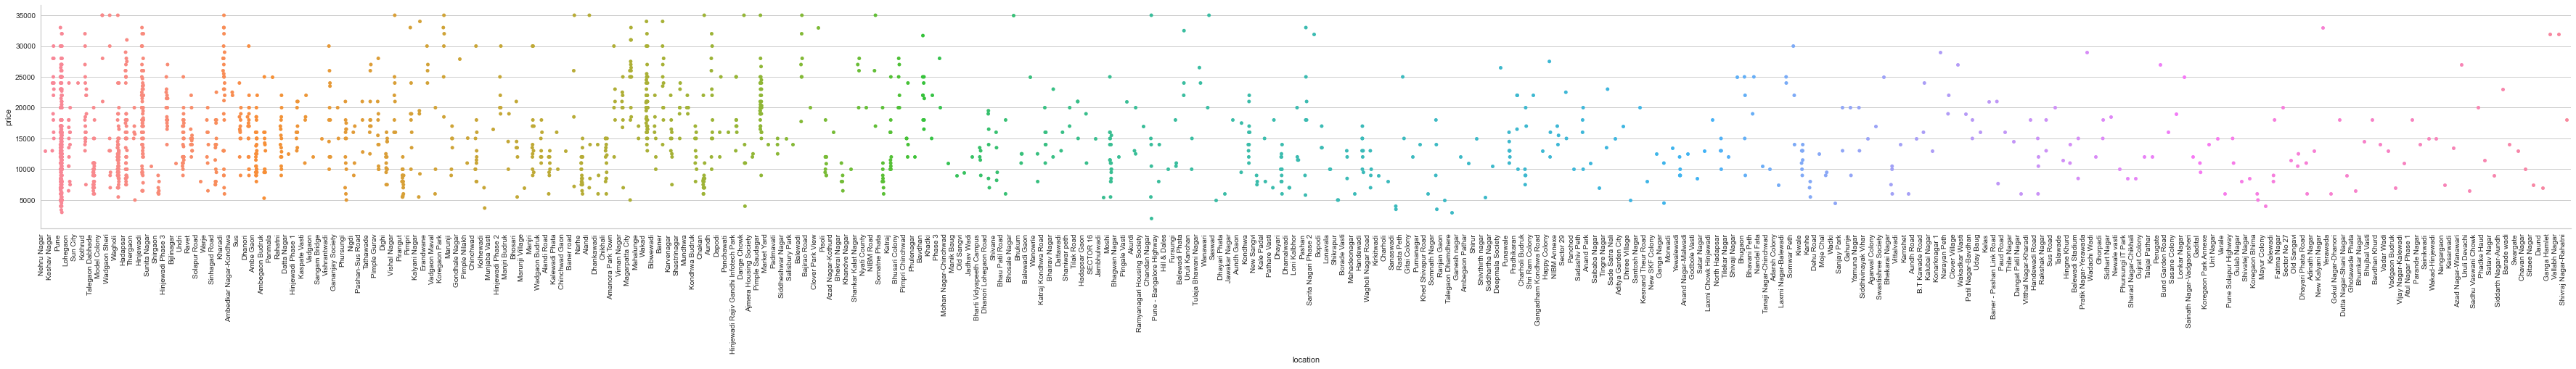

In [91]:
plt.figure(figsize=(150,5))
chart=sn.catplot('location','price',data=data,height=5,aspect=10)
chart.set_xticklabels(rotation=90,horizontalalignment='right')

#### it can be seen that price range is different for different locations

#### changing datatype of 'area' feature

In [92]:
data['area']=data['area'].astype(int)

#### as data is ready for model building, lets handle categorical variables

In [93]:
dummies=pd.get_dummies(data['condition'])

In [94]:
data=pd.concat([data,dummies],axis=1)

In [95]:
data=data.drop('condition',axis=1)

In [96]:
data

,bhk,area,price,location,Furnished,Semi-Furnished,Unfurnished
0,1.0,650,13000,Nehru Nagar,0,0,1
1,1.0,550,13000,Keshav Nagar,0,0,1
2,2.0,575,4000,Pune,0,1,0
3,1.0,550,8000,Lohegaon,0,0,1
4,2.0,900,24000,Sun City,0,0,1
...,...,...,...,...,...,...,...
1994,2.0,1000,15000,Hinjewadi,0,0,1
1995,2.0,430,18000,Kaspate Vasti,1,0,0
1996,2.0,1500,23000,Pimple Saudagar,1,0,0
1998,2.0,900,17000,Thergaon,0,0,1


In [97]:
dummies=pd.get_dummies(data['location'])

In [98]:
data=pd.concat([data,dummies],axis=1)

In [99]:
data=data.drop('location',axis=1)

In [100]:
data

,bhk,area,price,Furnished,Semi-Furnished,Unfurnished,Adarsh Colony,Adinath Nagar,Aditya Garden City,Agarwal Colony,...,Wagholi Nagar Road,Wakad,Wakad-Hinjewadi,Wakadkar Wasti,Wanawari,Wanowrie,Warje,Yamuna Nagar,Yerawada,Yewalewadi
0,1.0,650,13000,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.0,550,13000,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,575,4000,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,550,8000,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2.0,900,24000,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,2.0,1000,15000,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1995,2.0,430,18000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1996,2.0,1500,23000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1998,2.0,900,17000,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [101]:
x=data.drop('price',axis=1)

In [102]:
y=data['price'].astype(int)

In [103]:
x.columns

Index(['bhk', 'area', 'Furnished', 'Semi-Furnished', 'Unfurnished',
       'Adarsh Colony', 'Adinath Nagar', 'Aditya Garden City',
       'Agarwal Colony', 'Ajmera Housing Society',
       ...
       'Wagholi Nagar Road', 'Wakad', 'Wakad-Hinjewadi', 'Wakadkar Wasti',
       'Wanawari', 'Wanowrie', 'Warje', 'Yamuna Nagar', 'Yerawada',
       'Yewalewadi'],
      dtype='object', length=316)

#### as we have small dataset, we will avoid its spliting and use whole data for model learning

In [104]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(min_samples_split=2,min_samples_leaf=3,n_estimators=800,max_depth=12,random_state=10)
model=rf.fit(x,y)
model.score(x,y)

0.5141277763375327

#### model accuracy is low but acceptable as we have used small dataset for model building

#### we will use crossfold validation to validate the model

In [105]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
cv=ShuffleSplit(n_splits=2,test_size=0.25, random_state=5)
score=cross_val_score(model,x,y,cv=cv)
print(score)
print(np.mean(score))

[0.42669664 0.34551074]
0.38610369300567804


#### cross fold results are not satisfactory we need more data and additional features so that model learn satisfactorily. 

#### lets check residual plot

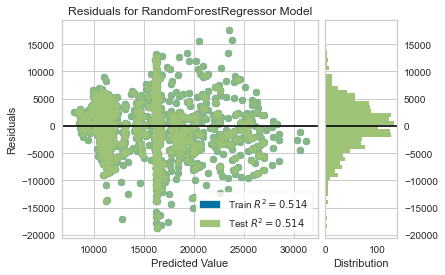

In [106]:
from yellowbrick.regressor import ResidualsPlot
visualizer=ResidualsPlot(model)
visualizer.fit(x,y)
visualizer.score(x,y)
visualizer.show()

#### It can be observed that residual is normallt distributd along zero line

#### Lets check model before API building

In [107]:
x.columns

Index(['bhk', 'area', 'Furnished', 'Semi-Furnished', 'Unfurnished',
       'Adarsh Colony', 'Adinath Nagar', 'Aditya Garden City',
       'Agarwal Colony', 'Ajmera Housing Society',
       ...
       'Wagholi Nagar Road', 'Wakad', 'Wakad-Hinjewadi', 'Wakadkar Wasti',
       'Wanawari', 'Wanowrie', 'Warje', 'Yamuna Nagar', 'Yerawada',
       'Yewalewadi'],
      dtype='object', length=316)

In [108]:
def predict_price(bhk,area,condition, location):
    loc_index1=np.where(x.columns==location)[0][0]
    loc_index2=np.where(x.columns==condition)[0][0]
    X=np.zeros(len(x.columns))
    X[0]=bhk
    X[1]=area
    X[loc_index1]=1
    X[loc_index2]=1
    return model.predict([X])[0]

In [109]:
predict_price(2,1000,'Furnished','Wakad')

18432.85321763501

#### dump model and column list using pickle and json

In [110]:
import pickle
pickle.dump(model,open('pune_rent_model_pickle.pkl','wb'))

In [112]:
import json
columns ={
    'data_columns' : [col for col in x.columns]
}
with open ('columns.json','w') as f:
    json.dump(columns,f)